XGboost Classification Project - Problem Statement

1.Problem statement
.this dataset comprises used cars sold on cardekho.com in india as well as important features of these cars.
.if user can predict the price of the car based on input features.
.Prediction results can be used to give new seller the price suggestion based on market condition.

2.Data Collection.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

# load data
df = pd.read_csv(r"./dataset/cardekho_dataset.csv", index_col=[0])

df.head()


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


3.Data Cleaning
Handling Missing values , dublicates, check data type, understand dataset.

In [4]:
#check null value
# check features with nan value
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [5]:
# Remove Unneccessary columns
df.drop(columns=['car_name', 'brand'], inplace=True, errors='ignore')

df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [6]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [7]:
# Getting All Different Types of features
num_features = [feature for feature in df.columns if df[feature].dtype != 'o']
print("Num of Numerical Features :",len(num_features))

#categorial features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'o']
print("Num of Categorical features :", len(cat_features))

# Discreate features
discrete_features = [feature for feature in num_features if len(df[feature].unique())<=25]
print("Num of Discrete Features :", len(discrete_features))

#continuous Features
continueus_feature = [feature for feature in num_features  if feature not in discrete_features]
print("Num of Continuous Features :", len(continueus_feature))


Num of Numerical Features : 11
Num of Categorical features : 0
Num of Discrete Features : 5
Num of Continuous Features : 6


In [8]:
# create price categories
df['price_class'] = pd.cut(
    df['selling_price'],
    bins=[0, 300000, 700000, df['selling_price'].max()],
    labels=[0, 1, 2]   # 0=Low, 1=Medium, 2=High
)

df['price_class'].value_counts()


price_class
1    8034
2    5098
0    2279
Name: count, dtype: int64

In [9]:
x = df.drop(['selling_price', 'price_class'], axis=1)
y = df['price_class']


Feature Encoding and Scalling
one Hot Encoding for columns which had lesser unique values adn ordinal

.one hot encoding is a process by which categorical variables are converted into a from  that could be provided to ML algorithms to do a better job in predicton.

In [10]:
#len of model
len(df['model'].unique())

120

In [11]:
#value count
df['model'].value_counts()

model
i20            906
Swift Dzire    890
Swift          781
Alto           778
City           757
              ... 
Ghibli           1
Altroz           1
GTC4Lusso        1
Aura             1
Gurkha           1
Name: count, Length: 120, dtype: int64

In [12]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['model'] = le.fit_transform(x['model'])

x.head()


,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,7,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,54,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,118,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,7,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,38,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [13]:
#seller_type
len(df['seller_type'].unique()),len(df['fuel_type'].unique()),len(df['transmission_type'].unique())

(3, 5, 2)

In [14]:
num_features = x.select_dtypes(include=['int64', 'float64']).columns
cat_features = x.select_dtypes(include=['object']).columns

onehot_columns = ['seller_type', 'fuel_type', 'transmission_type']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('OneHot', oh_transformer, onehot_columns),
        ('Scaler', numeric_transformer, num_features)
    ],
    remainder='drop'
)

x_transformed = preprocessor.fit_transform(x)





In [15]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.2 , random_state=42)
x_train.shape, x_test.shape



((12328, 13), (3083, 13))

MODEL Training And Model Selection

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  accuracy_score, f1_score, recall_score, roc_auc_score,precision_score
                           

In [17]:
## Beginning Model Training
models = {
   
    # "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    # "GradientBoost":GradientBoostingClassifier()
    "Xgboost":XGBClassifier()
}


for name, model in models.items():

    
    model.fit(x_train, y_train)


    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #probality
    y_train_proba = model.predict_proba(x_train)
    y_test_proba = model.predict_proba(x_test)

    #Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # calculate accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precison = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_roc = roc_auc_score(y_train, y_train_proba, multi_class='ovr', average='weighted')

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # calculate accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precison = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred , average='weighted')
    model_test_roc = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='weighted')

    print(f"{name} trained successfully")

    # print("")
    print("---------Model--Train--performace--------------------")
    print("accuracy_score :{:.4f}".format(model_train_accuracy))
    print("F1_score :{:.4f}".format(model_train_f1))
    print("Precision :{:.4f}".format(model_train_precison))
    print("Recall :{:.4f}".format(model_train_recall))
    print("roc_auc_score :{:.4f}".format(model_train_roc))

    print("------Model--performance--for--Test---")

    print("accuracy_score :{:.4f}".format(model_test_accuracy))
    print("F1_score :{:.4f}".format(model_test_f1))
    print("Precision :{:.4f}".format(model_test_precison))
    print("Recall :{:.4f}".format(model_test_recall))
    print("roc_auc_score :{:.4f}".format(model_test_roc))

    print("="*35)
    # print("\n")
    

AdaBoost trained successfully
---------Model--Train--performace--------------------
accuracy_score :0.8304
F1_score :0.8249
Precision :0.8389
Recall :0.8304
roc_auc_score :0.8916
------Model--performance--for--Test---
accuracy_score :0.8339
F1_score :0.8278
Precision :0.8450
Recall :0.8339
roc_auc_score :0.9009
Xgboost trained successfully
---------Model--Train--performace--------------------
accuracy_score :0.9415
F1_score :0.9415
Precision :0.9416
Recall :0.9415
roc_auc_score :0.9916
------Model--performance--for--Test---
accuracy_score :0.8729
F1_score :0.8727
Precision :0.8732
Recall :0.8729
roc_auc_score :0.9642


In [ ]:
## Initialize few parameter for Hyperparamter tuning
# knn_parms = {"n_neighbors":[2, 3, 10, 20, 40, 50]}
rf_params = {"max_depth":[5, 8, 15, None, 10],
             "max_features":[5, 7, "auto", 8],
             "min_samples_split":[2, 8, 15, 20],
             "n_estimators":[100 , 200, 500, 1000]
             }


# XGBoostclassifier
xgboost_prams = { "learning_rate":[0.1, 0.01],
                 "max_depth":[5, 8, 12, 20, 30],
                 "n_estimators":[100, 200, 300],
                 "colsample_bytree":[0.5, 0.8,1, 0.3, 0.4]

                    }



In [19]:
# MOdels list for Hyperparameter tuning
randomcv_models = [
                #    ('Ab', AdaBoostClassifier(), adaboost_pram),
                   ("RF",RandomForestClassifier(), rf_params),
                   ("XGBoost",XGBClassifier(),xgboost_prams)

                   ]




In [20]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

model_param ={}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=5,
                                cv=2,
                                verbose=2,
                                n_jobs=-1,
                                random_state=42)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

# print(model_param)
for model_name in model_param:
    print(f"------------------Best Params for {model_name}----------------------")
    print(model_param[model_name])

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Fitting 2 folds for each of 5 candidates, totalling 10 fits
------------------Best Params for RF----------------------
{'n_estimators': 200, 'min_samples_split': 15, 'max_features': 7, 'max_depth': 5}
------------------Best Params for XGBoost----------------------
{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1}


In [23]:
## Retraining the models with best parameters

models = {
    "Random Forest Classificaion": RandomForestClassifier(
        n_estimators=1000,
        max_depth=5,
        min_samples_split=20,
        max_features=8, 
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1
    ),
    
     "xgboost":XGBClassifier(
        n_estimators=200,
        min_samples_split=20,
        max_depth=5,
        colsample_bytree = 1,
        learning_rate=0.01,   
    )
   
    }

for name, model in models.items():

    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    y_train_proba = model.predict_proba(x_train)
    y_test_proba = model.predict_proba(x_test)
    #Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # calculate accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precison = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_roc = roc_auc_score(y_train, y_train_proba, multi_class='ovr', average='weighted')

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # calculate accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precison = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred , average='weighted')
    model_test_roc = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='weighted')

    print(name)
    print("---------Model--Train--performace--------------------")
    print("accuracy_score :{:.4f}".format(model_train_accuracy))
    print("F1_score :{:.4f}".format(model_train_f1))
    print("Precision :{:.4f}".format(model_train_precison))
    print("Recall :{:.4f}".format(model_train_recall))
    print("roc_auc_score :{:.4f}".format(model_train_roc))

    print("------Model--performance--for--Test---")

    print("accuracy_score :{:.4f}".format(model_test_accuracy))
    print("F1_score :{:.4f}".format(model_test_f1))
    print("Precision :{:.4f}".format(model_test_precison))
    print("Recall :{:.4f}".format(model_test_recall))
    print("roc_auc_score :{:.4f}".format(model_test_roc))

    print("=" * 40, "\n")


Random Forest Classificaion
---------Model--Train--performace--------------------
accuracy_score :0.8515
F1_score :0.8500
Precision :0.8554
Recall :0.8515
roc_auc_score :0.9464
------Model--performance--for--Test---
accuracy_score :0.8479
F1_score :0.8465
Precision :0.8511
Recall :0.8479
roc_auc_score :0.9466

xgboost
---------Model--Train--performace--------------------
accuracy_score :0.8727
F1_score :0.8721
Precision :0.8743
Recall :0.8727
roc_auc_score :0.9570
------Model--performance--for--Test---
accuracy_score :0.8631
F1_score :0.8622
Precision :0.8641
Recall :0.8631
roc_auc_score :0.9563



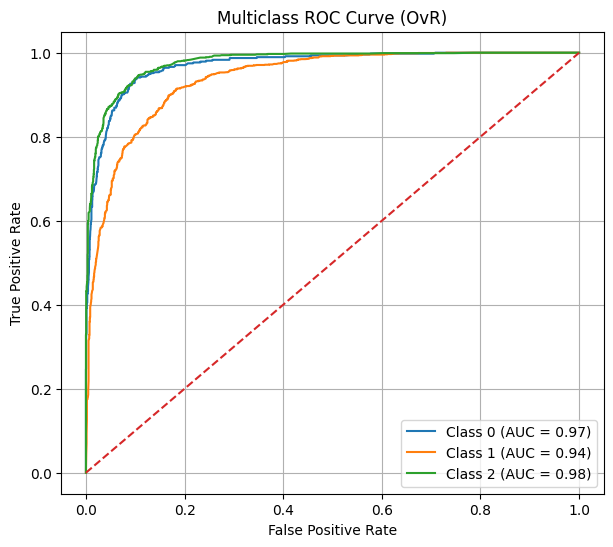

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

y_test_proba = model.predict_proba(x_test)

plt.figure(figsize=(7,6))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], y_test_proba[:, i])

    plt.plot(fpr, tpr, label=f"Class {cls} (AUC = {auc_score:.2f})")

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (OvR)')
plt.legend()
plt.grid(True)
plt.show()
